# Genpact Machine Learning Hackathon

<img src='../images/problem_statement.png'>
<img src='../images/data_dict.png'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
FILES_PATH = '../input/'
SUB_PATH = '../submissions/'

In [5]:
fci_df = pd.read_csv(f"{FILES_PATH}/fulfilment_center_info.csv")
mi_df = pd.read_csv(f"{FILES_PATH}/meal_info.csv")
train_df = pd.read_csv(f"{FILES_PATH}/train.csv")
test_df = pd.read_csv(f"{FILES_PATH}/test.csv")
sub_df = pd.read_csv(f"{FILES_PATH}/sample_submission.csv")

In [6]:
# head of fulfilment_center_info file
fci_df.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [8]:
print("Shape of fulfilment_center_info :", fci_df.shape)

Shape of fulfilment_center_info : (77, 5)


In [7]:
# NaN values in fulfilment_center_info
fci_df.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [9]:
# head of meal_info file
mi_df.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [10]:
print("Shape of meal_info: ", mi_df.shape)

Shape of meal_info:  (51, 3)


In [11]:
# NaN values in meal_info
mi_df.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [12]:
# Head of Train file (historical demand data)
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [13]:
print("Shape of train: ", train_df.shape)

Shape of train:  (456548, 9)


In [14]:
# NaN values in train data
train_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [15]:
# Head of Test data
test_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [16]:
print("Shape of Test: ", test_df.shape)

Shape of Test:  (32573, 8)


In [17]:
# NaN values in test data
test_df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

## EDA

### `fulfilment_center_info`

In [18]:
print("Total number of centers : ", fci_df['center_id'].nunique())

Total number of centers :  77


In [19]:
print("Types of centers : \n")
print(fci_df['center_type'].unique())

Types of centers : 

['TYPE_A' 'TYPE_B' 'TYPE_C']


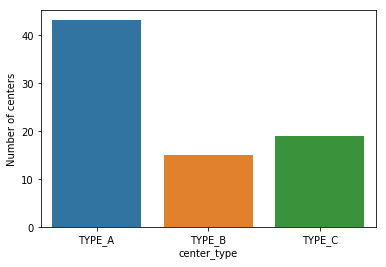

In [59]:
ax = sns.countplot(fci_df['center_type'])
ax.set(ylabel='Number of centers')
plt.show()

In [28]:
print("Total Number of cities: ", fci_df['city_code'].nunique())

Total Number of cities:  51


We have 77 stores in 51 cities, so some city have more than 1 center.

In [30]:
print("Total number of regions: ", fci_df['region_code'].nunique())

Total number of regions:  8


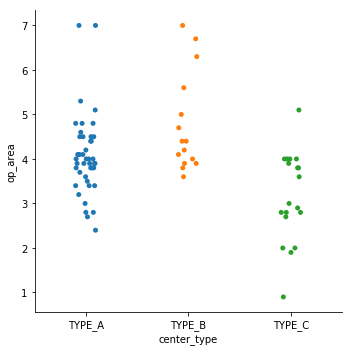

In [52]:
sns.catplot(x = 'center_type', y = 'op_area', data=fci_df)
plt.show()

In [80]:
fci_df['region_code'] = fci_df['city_code'].astype(str) + "_" + fci_df['region_code'].astype(str)
fci_df['region_code'].nunique()

51

so in the one city there is not any centers which are in different regions.
so maybe region code will not be helpful.

In [82]:
fci_df.drop('region_code', axis=1, inplace=True)

### `meal_info`

In [63]:
print("Total number of different types of meal: ", mi_df['meal_id'].nunique())

Total number of different types of meal:  51


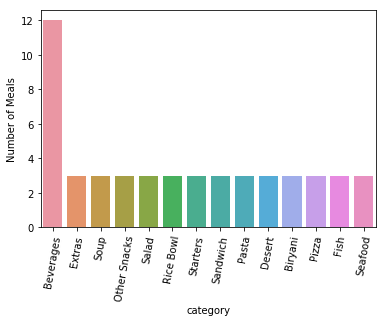

In [61]:
ax = sns.countplot(mi_df['category'])
ax.set(ylabel= "Number of Meals")
plt.xticks(rotation=80)
plt.show()

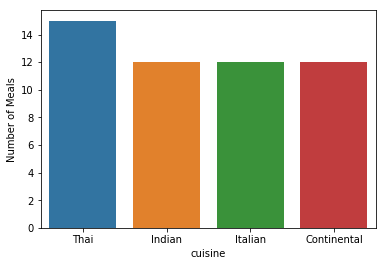

In [62]:
ax = sns.countplot(mi_df['cuisine'])
ax.set(ylabel= "Number of Meals")
plt.show()

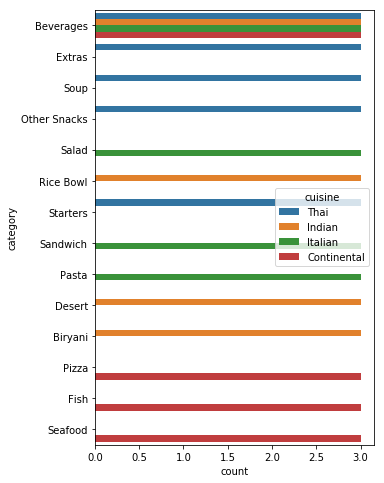

In [69]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = mi_df['category'], hue=mi_df['cuisine'], ax=ax)
plt.show()

### `Train (historical meal order data)`

In [84]:
train_df = pd.merge(train_df, fci_df, on='center_id')
test_df = pd.merge(test_df, fci_df, on='center_id')

train_df = pd.merge(train_df, mi_df, on='meal_id')
test_df = pd.merge(test_df, mi_df, on='meal_id')

In [87]:
train_df.head(20)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,TYPE_C,2.0,Beverages,Thai
5,1493612,6,55,1885,146.53,146.53,0,0,285,647,TYPE_C,2.0,Beverages,Thai
6,1110832,7,55,1885,145.53,146.53,0,0,148,647,TYPE_C,2.0,Beverages,Thai
7,1461167,8,55,1885,146.53,145.53,0,0,135,647,TYPE_C,2.0,Beverages,Thai
8,1102364,9,55,1885,134.83,134.83,0,0,175,647,TYPE_C,2.0,Beverages,Thai
9,1018130,10,55,1885,144.56,143.56,0,0,175,647,TYPE_C,2.0,Beverages,Thai
